# Part II - (Ford GoBike System Data)
## by (Mohannad Islam)

## Investigation Overview


> **Goals**:
This work investigates trends within the Ford GoBike System, with the aim of trip duration, rider behavior, and significant influencing attributes such as gender, age, and user class.


> **Key Insights**:
    1- The majority of trips are brief in length and distance.
    2- Subscribers and customers have shorter trips.
    3- Few gender differences between trip duration are present.
    4- The age factor barely affects trip behavior.
    5- Weak relations between numeric attributes indicate that environmental factors affect the trip duration and distance. 


## Dataset Overview and Executive Summary

> Ford GoBike is the Bay Area's bike-sharing system. Bay Area Bike Share was launched in 2013 as a regional test program, with 700 bikes and 70 stations in San Francisco and San Jose. Once expanded, Ford GoBike will have 7,000 bikes throughout San Francisco, the East Bay, and San Jose.

> Ford GoBike, like other bike share systems, comprises of a fleet of specifically constructed, sturdy, and durable bikes that are docked at a network of stations across the city. The bikes may be unlocked at one station and returned to any other in the system, making them perfect for one-way journeys. People utilize bike sharing to get to work or school, run errands, attend appointments or social gatherings, and more. It's a fun, easy, and economical way to go around.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime 
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv(r"C:\Users\PC\Desktop\Code\Communicate Data Findings\project\fordgo_master_clean.csv")

In [4]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,41,February,2,Thu,17,8,869,0.544709
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,53,February,2,Thu,12,5,1030,2.704545
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,36,February,2,Thu,17,4,608,0.260739
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,51,February,2,Thu,23,0,26,2.409301
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,66,February,2,Thu,23,0,29,3.332203


## (Ford GoBike Usage by Hour)

- The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.



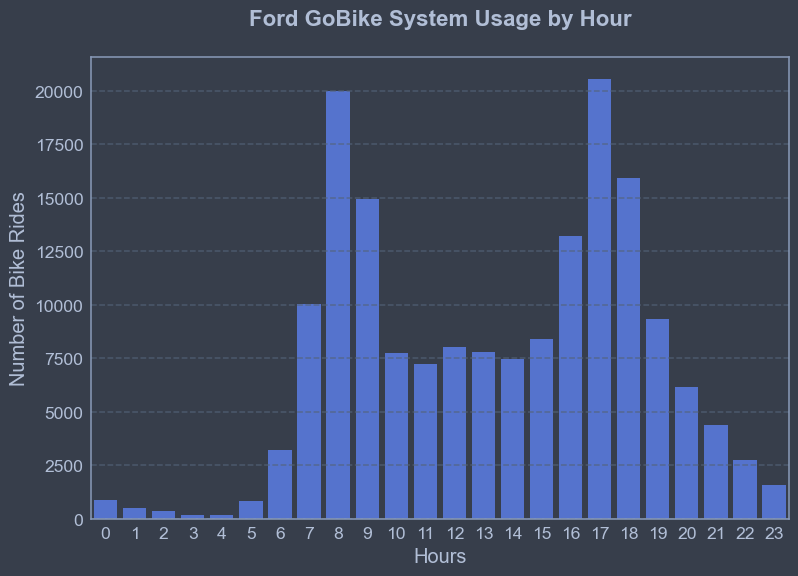

In [5]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df_cleaned, x='start_time_hour', color="royalblue")

plt.xlabel('Hours')
plt.ylabel('Number of Bike Rides')
plt.title('Ford GoBike System Usage by Hour', fontsize=16, fontweight='bold', y=1.05)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## (Gender Distribution of Bike Riders)

- This pie chart illustrates the gender distribution of Ford GoBike users. The majority (74.6%) are male, while females make up 23.3%, and 2.1% identify as "Other." The significant male dominance suggests that bike-sharing services may be more popular among men.
- Since men form the largest user base, promotions and loyalty programs could focus on retaining male users while encouraging more female participation.
- 'Other' may occur because :
        - Some users may choose not to disclose their gender.
        - If someone forgot, skipped, or didn’t select a gender when signing up, the data might be categorized under "Other".

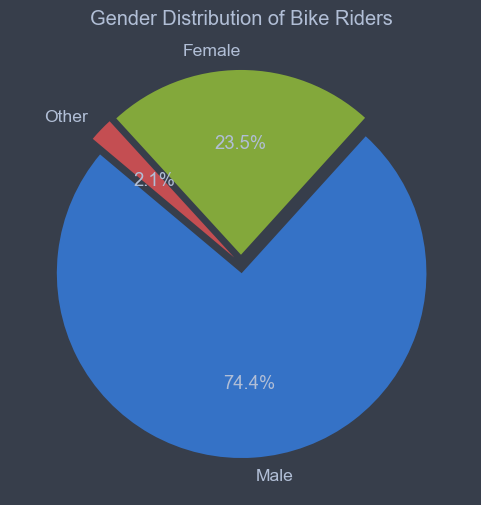

In [6]:
gender_counts = df_cleaned['member_gender'].value_counts()

# Define colors and explode settings
# colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.05, 0.05, 0.05)  # Slightly separate slices for emphasis

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',  explode=explode, startangle=140)
plt.title('Gender Distribution of Bike Riders')
plt.show()

## (Trip Duration vs. Distance (Gender & Age))

- The majority of trips are clustered below 10 km and 200 minutes, suggesting that users mostly take short rides.
- A few extreme outliers exceed 50 km and 1000+ minutes, indicating rare long-distance or extended-duration rides.
- Inverse correlation pattern:
    - As distance increases, the duration remains relatively controlled, meaning longer trips are more efficient (likely taken at a steady pace).
    - However, for very short trips, duration varies widely, possibly due to pauses, slow speeds, or different trip purposes.
- Riders of different age groups seem evenly distributed, meaning age does not play a major role in trip efficiency.

<Figure size 1000x600 with 0 Axes>

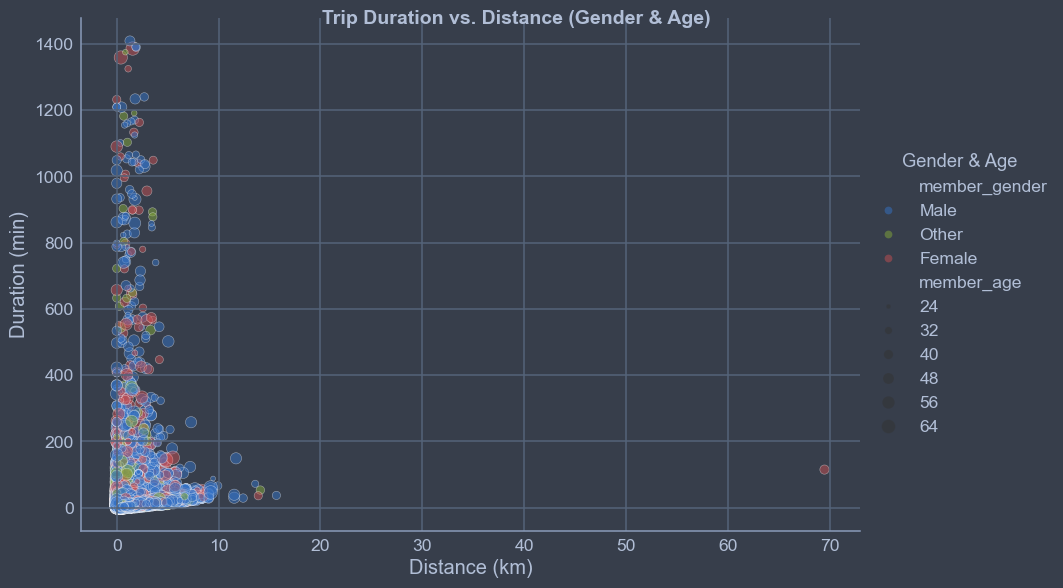

In [7]:
plt.figure(figsize=(10, 6))
scatter = sns.relplot(
    data=df_cleaned, 
    x='distance_km', 
    y='duration_min', 
    hue='member_gender', 
    size='member_age', 
    alpha=0.5,
    sizes=(10, 100),  
    height=6, 
    aspect=1.5
)

scatter.set_axis_labels('Distance (km)', 'Duration (min)')
scatter._legend.set_title('Gender & Age')
scatter.fig.suptitle('Trip Duration vs. Distance (Gender & Age)', fontsize=14, fontweight='bold')

plt.show()

## (Ford GoBike System Trends by User Type)

- The number of bike trips from subscribers is significantly higher than from customers on all days of the week.
- Bike usage among subscribers drops significantly on Saturday and remains low on Sunday, indicating lower work-related demand.
- Unlike subscribers, customers show relatively steady usage throughout the week, with only minor fluctuations.

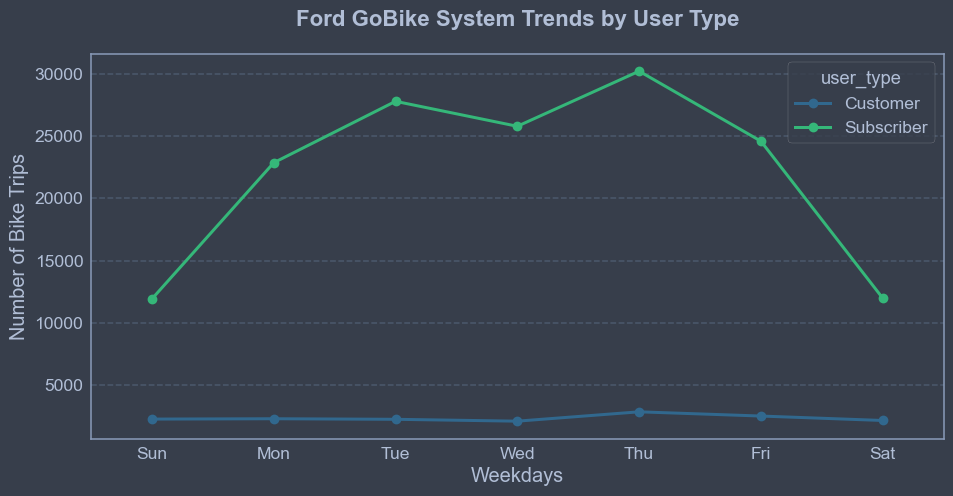

In [8]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(11, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index(name='trip_count')
weekday = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y='trip_count', hue='user_type', 
              order=weekday, palette='viridis', markers='o', linestyles='-')

plt.title('Ford GoBike System Trends by User Type', fontsize=16, fontweight='bold', y=1.05)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
